# Chapter 2
In this chapter, we will build a simple logistic model based on the two car datasets of models from 2010 and 2011.

The imports used here are the Pandas library, which is used for structuring datasets from CSV files. It can be used for a number of things, and is made for fast processing of tabular data within Python. More can be read here:

Next, we are using the Sklearn (once known as scipy) library and importing the linear regression object. This object can be trained with tabular data, then be used to make predictions based on the inputs, given the length of said inputs are equal to the length of parameters the model generates. More about the LinearRegression object can be read here:

%pylab inline as an import of matplotlib used to work in IPython and Jupyter Notebooks. These plots are interactive.

In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
cars2010 = pd.read_csv('PythonDatasets/cars2010.csv')
cars2011 = pd.read_csv('PythonDatasets/cars2011.csv')


We look at the dataset and the independent variables it contains. Note that FE stands for Fuel Efficency, or MPG.

In [3]:
cars2010.columns

Index(['Unnamed: 0', 'EngDispl', 'NumCyl', 'Transmission', 'FE',
       'AirAspirationMethod', 'NumGears', 'TransLockup', 'TransCreeperGear',
       'DriveDesc', 'IntakeValvePerCyl', 'ExhaustValvesPerCyl',
       'CarlineClassDesc', 'VarValveTiming', 'VarValveLift'],
      dtype='object')

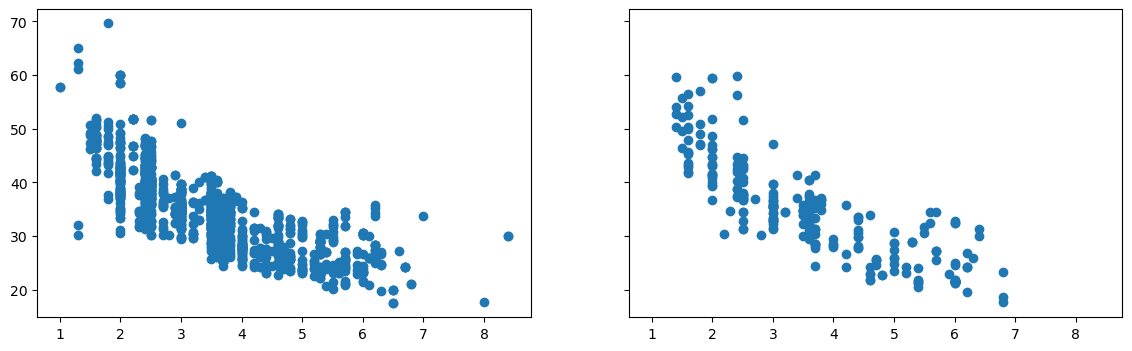

In [4]:
fig, (ax1, ax2) = subplots(nrows=1,
                           ncols=2,
                           sharey=True,
                           sharex=True,
                           figsize=(14,4))

#plot(cars2010['EngDispl'],cars2010['FE'],marker='o',linestyle='None')
#plot(cars2011['EngDispl'],cars2011['FE'],marker='o',linestyle='None')

#cars2010['FE'].plot(ax=ax1,marker='o',linestyle='None')
#cars2011['FE'].plot(ax=ax2,marker='o',linestyle='None')

ax1.scatter(cars2010['EngDispl'],cars2010['FE'])
ax2.scatter(cars2011['EngDispl'],cars2011['FE'])

#ax1.set_xlabel('EngDispl')
#ax2.set_xlabel('EngDispl')

#xlabel('Engine Displacement')
#ylabel('Fuel efficiency (MPG)')

In [6]:
x_train = cars2010[['EngDispl']]
y_train = cars2010['FE']
mpgModel = LinearRegression()
mpgModel.fit(x_train, y_train)


LinearRegression()

In [7]:
#x_test = cars2011[['EngDispl']]
#y_test = cars2011['FE']
y_train_predictions = mpgModel.predict(x_train)


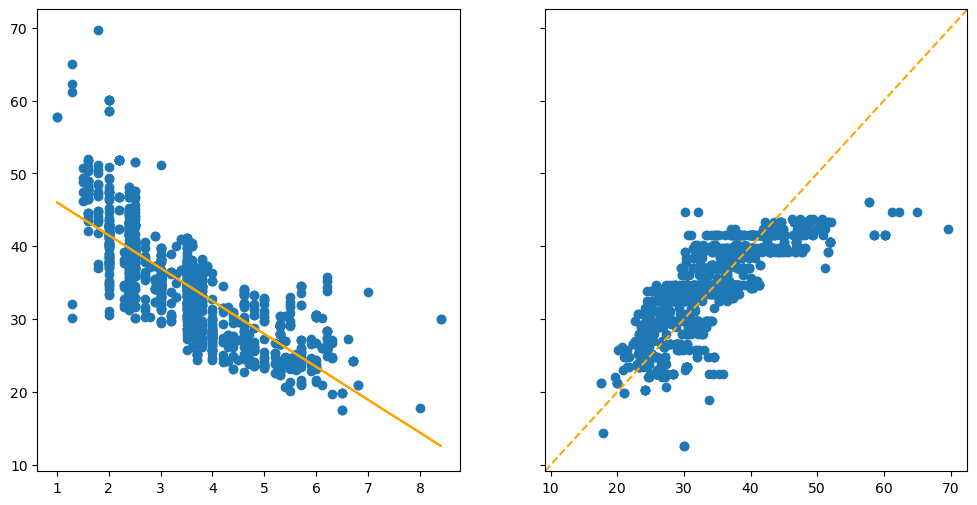

In [38]:
fig, (ax1, ax2) = subplots(nrows=1,
                           ncols=2,
                           sharey=True,
                           figsize=(12,6))

#plot(cars2010['EngDispl'],cars2010['FE'],marker='o',linestyle='None')
#plot(cars2011['EngDispl'],cars2011['FE'],marker='o',linestyle='None')

#cars2010['FE'].plot(ax=ax1,marker='o',linestyle='None')
#cars2011['FE'].plot(ax=ax2,marker='o',linestyle='None')

ax1.scatter(cars2010['EngDispl'],cars2010['FE'])
ax1.plot(cars2010['EngDispl'],y_train_predictions,color='orange')


ax2.scatter(y_train,y_train_predictions)
ax2.axline((12,12),slope=1,linestyle='dashed',color='orange')

#ax2.plot(cars2010['EngDispl'],y_train_predictions,color='orange')

#ax1.set_xlabel('EngDispl')
#ax2.set_xlabel('EngDispl')

#xlabel('Engine Displacement')
#ylabel('Fuel efficiency (MPG)')


In [45]:

quad = make_pipeline(PolynomialFeatures(2), LinearRegression())
quad.fit(x_train,y_train)
y_train_predictions_quad = quad.predict(x_train)


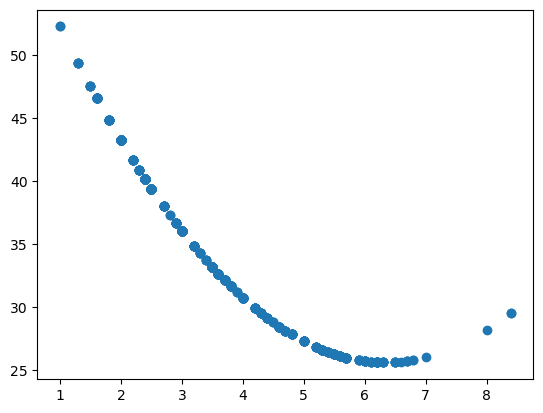

In [48]:
plot(cars2010['EngDispl'],y_train_predictions_quad,marker='o',linestyle='none')
